# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
# Importamos las librerías necesarias para el análisis de datos y machine learning
import pandas as pd          # Para manipulación y análisis de datos (DataFrames)
import seaborn as sns        # Para visualizaciones estadísticas atractivas
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal

# Cargamos los datos de salarios desde un archivo CSV
# Este dataset contiene la relación entre años de experiencia y salario
df = pd.read_csv('data/salary_data.csv')

# Mostramos las primeras 5 filas del dataset para entender su estructura
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
# Preparamos los datos para el modelo de machine learning

# X: Variable independiente (característica/feature) - años de experiencia
# Usamos doble corchete [['YearsExperience']] para mantener formato DataFrame (2D)
# Esto es necesario porque sklearn espera una matriz 2D, no un array 1D
X = df[['YearsExperience']]

# y: Variable dependiente (target/objetivo) - salario que queremos predecir
# Usamos un solo corchete porque y puede ser un array 1D
y = df['Salary']

In [3]:
# Creamos una instancia del modelo de regresión lineal
# LinearRegression() crea un objeto que implementa el algoritmo de regresión lineal
# Este modelo intentará encontrar la mejor línea recta que se ajuste a los datos
lin_reg = LinearRegression()

In [4]:
# Entrenamos el modelo con nuestros datos
# .fit() es el método que "aprende" de los datos
# El modelo encuentra los mejores coeficientes (pendiente e intersección) 
# para minimizar el error entre las predicciones y los valores reales
# Fórmula: y = mx + b, donde m es la pendiente y b es la intersección
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# Evaluamos qué tan bien se ajusta nuestro modelo a los datos
# .score() calcula el coeficiente de determinación R²
# R² varía entre 0 y 1:
# - 1.0 = ajuste perfecto (el modelo explica 100% de la varianza)
# - 0.0 = el modelo no es mejor que predecir la media
# - Valores negativos = el modelo es peor que predecir la media
# Un R² de 0.956 significa que el modelo explica el 95.6% de la variabilidad
lin_reg.score(X,y)

0.9569566641435086

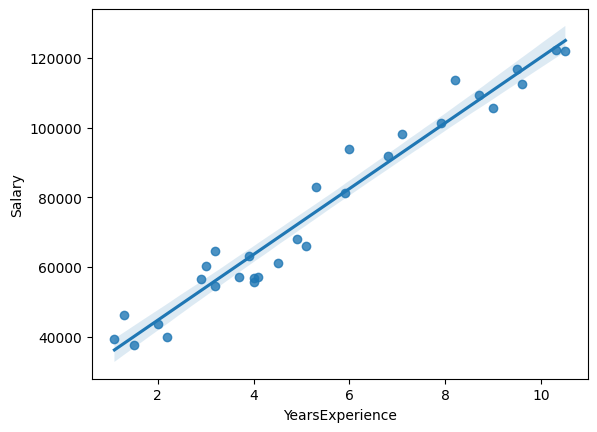

In [6]:
# Visualizamos los datos y la línea de regresión
# sns.regplot() crea un gráfico de dispersión con la línea de regresión
# - data: el DataFrame que contiene nuestros datos
# - x: variable en el eje horizontal (años de experiencia)
# - y: variable en el eje vertical (salario)
# Esto nos ayuda a ver visualmente qué tan bien se ajusta la línea a los puntos
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [7]:
# Cargamos un nuevo dataset que muestra la relación entre posición laboral y salario
# Este dataset es más complejo y no lineal - los salarios crecen exponencialmente
# según el nivel de la posición (de analista a CEO)
df = pd.read_csv('data/position_salaries.csv')

# Mostramos todo el dataset (es pequeño, solo 10 filas)
# Notamos que hay una progresión no lineal en los salarios
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
# Preparamos los datos para el modelo
# .iloc[:, 1:2] selecciona todas las filas (:) y la columna 1 (Level)
# Usamos 1:2 en lugar de solo 1 para mantener el formato de matriz 2D
# .values convierte el DataFrame en un array de NumPy (formato que prefiere sklearn)
X = df.iloc[:, 1:2].values

# .iloc[:, 2] selecciona la columna 2 (Salary) como nuestra variable objetivo
# Esta es la variable que queremos predecir
y = df.iloc[:, 2].values

In [9]:
# Importamos y creamos un nuevo modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Creamos una nueva instancia del modelo de regresión lineal
lin_reg = LinearRegression()

# Entrenamos el modelo con los nuevos datos (posición vs salario)
# Intentamos ajustar una línea recta a datos que claramente no son lineales
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Evaluamos el rendimiento del modelo lineal con los nuevos datos
# Un R² de 0.669 significa que el modelo solo explica el 66.9% de la variabilidad
# Esto es mucho peor que el 95.6% del dataset anterior
# Indica que una línea recta NO es adecuada para estos datos no lineales
lin_reg.score(X,y)

0.6690412331929895

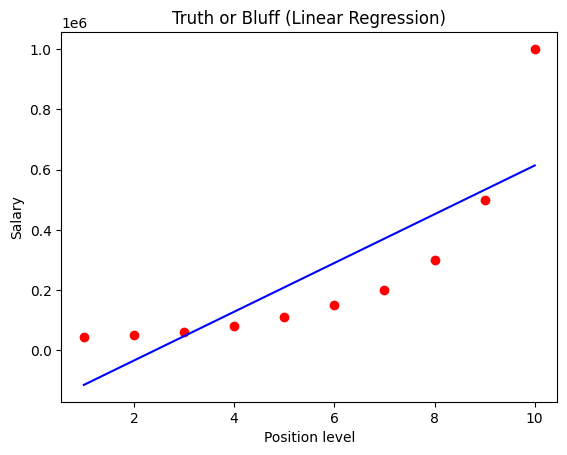

In [11]:
# Creamos una función para visualizar los resultados de la regresión lineal
def viz_linear():
    # plt.scatter() crea un gráfico de dispersión con los datos reales
    # - X: valores en el eje x (nivel de posición)
    # - y: valores en el eje y (salario real)
    # - color='red': puntos rojos para los datos reales
    plt.scatter(X, y, color='red')
    
    # plt.plot() dibuja la línea de predicción del modelo
    # - X: mismos valores del eje x
    # - lin_reg.predict(X): salarios predichos por el modelo lineal
    # - color='blue': línea azul para las predicciones
    plt.plot(X, lin_reg.predict(X), color='blue')
    
    # Añadimos títulos y etiquetas para hacer el gráfico más informativo
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    
    # Mostramos el gráfico
    plt.show()
    return

# Llamamos a la función para ver cómo se ajusta la línea recta a los datos
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

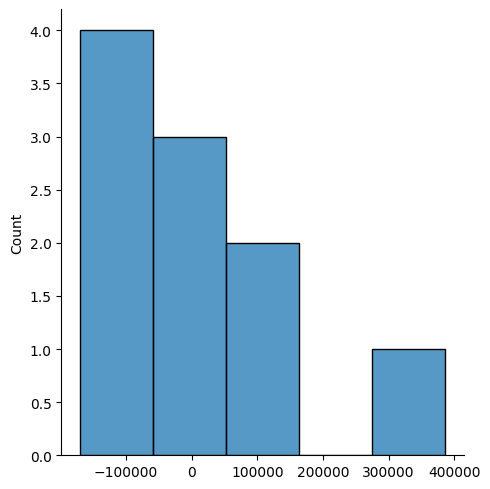

In [12]:
# Analizamos los residuos (errores) del modelo lineal
# Los residuos son la diferencia entre valores reales y predicciones: y_real - y_predicho
# sns.displot() crea un histograma de la distribución de los residuos
# Si el modelo es bueno, los residuos deberían seguir una distribución normal centrada en 0
# Si vemos patrones o asimetría, indica que el modelo no captura bien la relación
sns.displot(y - lin_reg.predict(X));

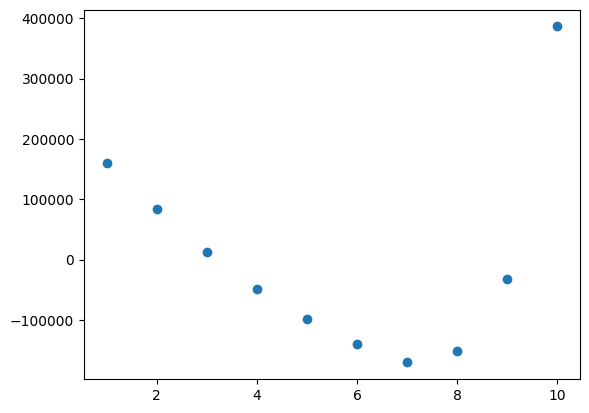

In [13]:
# Creamos un gráfico de dispersión de los residuos vs valores predichos
# plt.scatter() muestra los residuos en el eje y contra las posiciones en el eje x
# Este gráfico ayuda a identificar patrones en los errores:
# - Si los puntos están aleatoriamente distribuidos alrededor de y=0, el modelo es bueno
# - Si vemos una curva o patrón, significa que necesitamos un modelo más complejo
# En este caso, veremos un patrón curvo que indica la necesidad de regresión polinómica
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. (añadimos complejidad a nuestro modelo)

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2 (elevamos al cuadrado)

En nuestro caso tenemos una única variable con degree = 2: a^0, a^1, a^2

In [14]:
# Mostramos la estructura actual de nuestros datos X
# X contiene solo los niveles de posición (1, 2, 3, ..., 10)
# Cada fila tiene un solo valor, lo que significa que tenemos una sola característica
# Para regresión polinómica, necesitaremos crear características adicionales (X², X³, etc.)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Ejemplo conceptual de una función polinómica de grado 2
# Esta línea muestra la fórmula: y = 2 + 3 * X²
# - Cuando x = 0: y = 2 + 3(0)² = 2
# - Cuando x = 1: y = 2 + 3(1)² = 2 + 3 = 5  
# - Cuando x = 2: y = 2 + 3(2)² = 2 + 12 = 14
# Esto ilustra cómo los polinomios pueden capturar relaciones no lineales
# y = 2 + 3 * X ** 2
# x = 0; y=2
# x=1; y =5
# x=2; y = 14

In [15]:
# Importamos PolynomialFeatures para crear características polinómicas
from sklearn.preprocessing import PolynomialFeatures

# Creamos un objeto PolynomialFeatures con grado 2
# degree=2 significa que generará términos hasta X²
# Para una variable X, creará: 1 (término constante), X, X²
poly_feats = PolynomialFeatures(degree = 2)

# fit_transform() hace dos cosas:
# 1. fit(): "aprende" las características de los datos originales
# 2. transform(): transforma X original en X_poly con las nuevas características
X_poly = poly_feats.fit_transform(X)

# Mostramos el resultado: cada fila ahora tiene 3 columnas en lugar de 1
# Columna 0: término constante (siempre 1)
# Columna 1: valor original de X
# Columna 2: X al cuadrado (X²)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Resultado = x ^ 0, x ^ 1, x ^ 2 

In [16]:
# Creamos un nuevo modelo de regresión lineal para los datos polinómicos
# Aunque es "regresión lineal", ahora trabaja con características polinómicas
# El modelo será: y = b₀ + b₁*X + b₂*X²
pol_reg = LinearRegression()

# Entrenamos el modelo con las características polinómicas (X_poly)
# Ahora el modelo puede capturar relaciones no lineales porque tiene términos X²
pol_reg.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Mostramos los coeficientes del modelo polinómico
# pol_reg.coef_ contiene los coeficientes [b₀, b₁, b₂] de la ecuación:
# y = b₀ + b₁*X + b₂*X²
# - Primer valor (~0): coeficiente del término constante 
# - Segundo valor (~-132871): coeficiente de X (término lineal)
# - Tercer valor (~19431): coeficiente de X² (término cuadrático)
pol_reg.coef_

array([      0.        , -132871.21212121,   19431.81818182])

`x^0 + x^1 + x^2 + x^3 + x^4 `

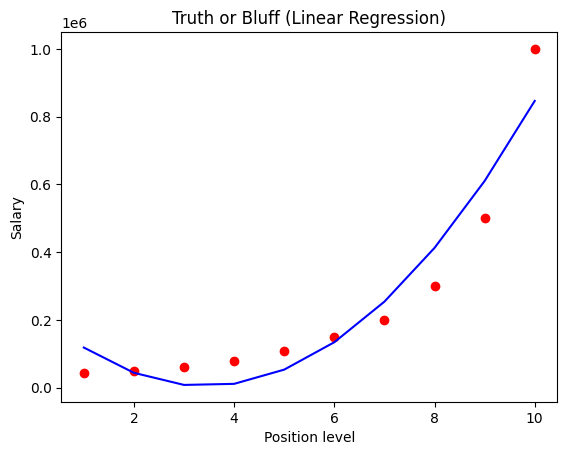

In [18]:
# Creamos una función para visualizar los resultados de la regresión polinómica
def viz_polymonial():
    # plt.scatter() muestra los datos reales como puntos rojos
    plt.scatter(X, y, color='red')
    
    # plt.plot() dibuja la curva de predicción del modelo polinómico
    # Usamos X_poly porque el modelo fue entrenado con características polinómicas
    # La línea azul ahora será una curva que se ajusta mejor a los datos
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    
    # Añadimos títulos y etiquetas (mismo título pero ahora es regresión polinómica)
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    
    # Mostramos el gráfico
    plt.show()
    return

# Ejecutamos la función para ver cómo la curva se ajusta mejor a los datos
viz_polymonial()

In [19]:
# Verificamos la estructura de nuestros datos polinómicos transformados
# X_poly ahora tiene 3 columnas para cada observación:
# Columna 0: 1 (término constante)
# Columna 1: valor original de X (1, 2, 3, ..., 10)  
# Columna 2: X² (1, 4, 9, 16, 25, 36, 49, 64, 81, 100)
# Esta transformación permite al modelo lineal capturar relaciones cuadráticas
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [20]:
# Evaluamos el rendimiento del modelo polinómico de grado 2
# Calculamos el R² usando las características polinómicas
# Un R² de 0.916 significa que el modelo explica el 91.6% de la variabilidad
# Esto es mucho mejor que el 66.9% del modelo lineal
# Indica que la regresión polinómica captura mejor la relación no lineal
pol_reg.score(X_poly,y)

0.9162082221443942

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [21]:
# Hacemos una predicción con el modelo lineal para nivel 7
# [[7]] se usa porque sklearn espera una matriz 2D (incluso para una sola predicción)
# El modelo lineal predice aproximadamente $370,818 para nivel 7
print(lin_reg.predict([[7]]))

[370818.18181818]


In [22]:
# Hacemos una predicción con el modelo polinómico para nivel 7
# Primero debemos transformar [[7]] a características polinómicas usando poly_feats.transform()
# Esto convierte [7] en [1, 7, 49] (constante, X, X²)
# El modelo polinómico predice aproximadamente $254,227 para nivel 7
# Esta predicción está más cerca del valor real ($200,000) que la predicción lineal
print(pol_reg.predict(poly_feats.transform([[7]])))

[254227.27272727]


In [23]:
# Recargamos los datos para empezar un nuevo experimento
# Vamos a probar diferentes grados de polinomios para encontrar el óptimo
df = pd.read_csv('data/position_salaries.csv')

# Preparamos los datos de la misma manera que antes
X = df.iloc[:, 1:2].values  # Niveles de posición (1-10)
y = df.iloc[:, 2].values    # Salarios correspondientes

In [24]:
# Experimentamos con un polinomio de grado 3 (elevado a 3 / cubo)
from sklearn.preprocessing import PolynomialFeatures

# degree=3 creará características: 1, X, X², X³
# Para X=2, generará: [1, 2, 4, 8]
poly_feats = PolynomialFeatures(degree = 3)

# fit() "aprende" la estructura para la transformación
poly_feats.fit(X)

# transform() aplica la transformación polinómica
# Ahora cada fila tiene 4 columnas: constante, X, X², X³
X_poly = poly_feats.transform(X)

# Mostramos el resultado - ahora tenemos términos hasta X³
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [25]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# train_test_split() divide los datos aleatoriamente:
# - X_poly: características polinómicas (entrada)
# - y: salarios (salida/target)
# - test_size=0.2: 20% para prueba, 80% para entrenamiento
# - random_state=0: fija la semilla aleatoria para resultados reproducibles
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=0) 

In [26]:
# Creamos y entrenamos un nuevo modelo de regresión polinómica de grado 3
pol_reg = LinearRegression()

# Entrenamos solo con los datos de entrenamiento (X_train, y_train)
# Es importante entrenar solo con datos de entrenamiento para evaluar 
# correctamente el rendimiento en datos no vistos (generalización)
pol_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


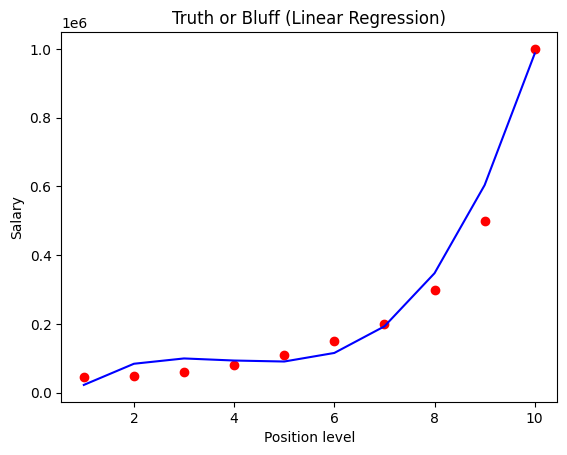

In [27]:
# Visualizamos los resultados del modelo de grado 3
def viz_polymonial():
    # Puntos rojos: datos reales originales
    plt.scatter(X, y, color='red')
    
    # Línea azul: predicciones del modelo polinómico de grado 3
    # Usamos todos los datos transformados (X_poly) para ver la curva completa
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level') 
    plt.ylabel('Salary')
    plt.show()
    return

# Ejecutamos para ver cómo el polinomio de grado 3 se ajusta a los datos
viz_polymonial()

In [28]:
# Evaluamos el rendimiento del modelo polinómico de grado 3
# R² de 0.977 significa que el modelo explica el 97.7% de la variabilidad
# Esto es mejor que el grado 2 (91.6%) pero debemos verificar si no hay sobreajuste
# Un R² muy alto en entrenamiento pero bajo en prueba indicaría sobreajuste
pol_reg.score(X_poly,y)

0.9773339064300366

# Decisión final

### Regresión lineal

In [29]:
# Preparamos los datos para la comparación final de modelos
# Volvemos a cargar y preparar los datos para hacer una evaluación sistemática
X = df.iloc[:, 1:2].values  # Niveles de posición
y = df.iloc[:, 2].values    # Salarios

In [30]:
# Dividimos los datos para la evaluación de regresión lineal
# Usamos random_state=12 (diferente al anterior) para una división diferente
# Esto permite evaluar la consistencia del modelo con diferentes divisiones
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)

In [31]:
# Evaluación completa del modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Creamos y entrenamos el modelo lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
predictions = lin_reg.predict(X_test)

# Calculamos múltiples métricas de evaluación:
print("MAE:", mean_absolute_error(y_test, predictions))     # Error absoluto medio
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))  # Error porcentual absoluto medio
print("MSE:", mean_squared_error(y_test, predictions))      # Error cuadrático medio
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))     # Raíz del error cuadrático medio
print("r2_score train", lin_reg.score(X_train, y_train))   # R² en entrenamiento
print("r2_score test",lin_reg.score(X_test, y_test))       # R² en prueba (más importante)

MAE: 117757.35294117642
MAPE: 0.621629901960784
MSE: 16144048713.235283
RMSE: 127059.23308927723
r2_score train 0.6696578058045868
r2_score test 0.47284738895558265


#### Regresión polinómica grado 2

In [32]:
# Evaluación completa del modelo polinómico de grado 2
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Creamos características polinómicas de grado 2
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

# Dividimos los datos polinómicos con la misma semilla aleatoria para comparación justa
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

# Entrenamos el modelo con características polinómicas
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacemos predicciones y evaluamos
predictions = lin_reg.predict(X_test)

# Mismas métricas que el modelo lineal para comparación directa
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 80182.39492466275
MAPE: 0.17927570711075902
MSE: 11624413613.806631
RMSE: 107816.57392908861
r2_score train 0.9306985085444903
r2_score test 0.6204273105695794


#### Regresión polinómica grado 3

In [33]:
# Evaluación completa del modelo polinómico de grado 3
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Creamos características polinómicas de grado 3 (incluye términos hasta X³)
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

# Misma división aleatoria para comparación justa
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

# Entrenamos y evaluamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

# Evaluamos con las mismas métricas
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 75733.05633498717
MAPE: 0.2650203252032555
MSE: 6468116429.644895
RMSE: 80424.60089826306
r2_score train 0.9929197843838078
r2_score test 0.7887961982156769


In [34]:
# Evaluación del modelo polinómico de grado 4
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Grado 4 incluye términos: 1, X, X², X³, X⁴
# Mayor complejidad puede capturar patrones más detallados pero riesgo de sobreajuste
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

# Observa si mejoran las métricas o si hay signos de sobreajuste
# (R² muy alto en train pero bajo en test)
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 35697.625855366
MAPE: 0.10747601225090826
MSE: 1683753165.7893233
RMSE: 41033.56145631675
r2_score train 0.9994604200254161
r2_score test 0.9450203047905527


In [35]:
# Evaluación del modelo polinómico de grado 6
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Grado 6 incluye términos hasta X⁶ - modelo muy complejo
# Con pocos datos (10 observaciones), existe alto riesgo de sobreajuste
# Pero vamos a evaluar su rendimiento
poly_feats = PolynomialFeatures(degree = 6)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

# Evaluamos si la alta complejidad mejora o empeora la generalización
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 11745.540321662149
MAPE: 0.02996338886402784
MSE: 218449009.62523842
RMSE: 14780.020623302202
r2_score train 0.9999999052407443
r2_score test 0.9928669711142779


Escogemos el modelo de regresión polinómica de grado 6, al ser el modelo que mejor generaliza!

In [50]:
# Evaluación del modelo polinómico de grado 7 (máxima complejidad)
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Grado 7 incluye términos hasta X⁷ - extremadamente complejo
# Con solo 10 observaciones, este modelo tiene 8 parámetros (casi tantos como datos)
# Esto generalmente lleva a sobreajuste severo
poly_feats = PolynomialFeatures(degree = 6)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

# Esperamos ver R² perfecto (1.0) en entrenamiento pero menor en prueba
# Esto confirmará el problema del sobreajuste
print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))  # Probablemente 1.0
print("r2_score test",lin_reg.score(X_test, y_test))      # Menor que grado 6

MAE: 11745.540321662149
MAPE: 0.02996338886402784
MSE: 218449009.62523842
RMSE: 14780.020623302202
r2_score train 0.9999999052407443
r2_score test 0.9928669711142779
